# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

I run 55 simulation steps and the car did not move all time. I assume, that it will not move without code modification. 

The agent receives both positive and negative rewards. The rewards have different values not only for different actions (expected) but also for the same action (not expected) if the action is repeated. 

As the car is not moving, red light brings positive reward, because the car is doing right - red means stop. On the other hand, green means go, as long as there is no oncoming traffic. But the car does not move and receives the negative reward.  


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

The num_dummies flag is the number of dummy agents. We can increase or decrease the default value, which is 100. We can change the grid size, by setting the grid_size flag to (x, y) tuple, where x is the number of vertical streets (columns) and y is the number of horizontal streets (rows). If the verbose flag is set to True, the simulation produces more information about the environment eg. location, heading, action etc. 

If the agent performs an action the act() method of the Environment class is called. 

The render method of the simulator is using GUI for visualization and the render_text method is using only the terminal/command_prompt as the output. 

The planner first considers the East-West direction from the current location and then North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


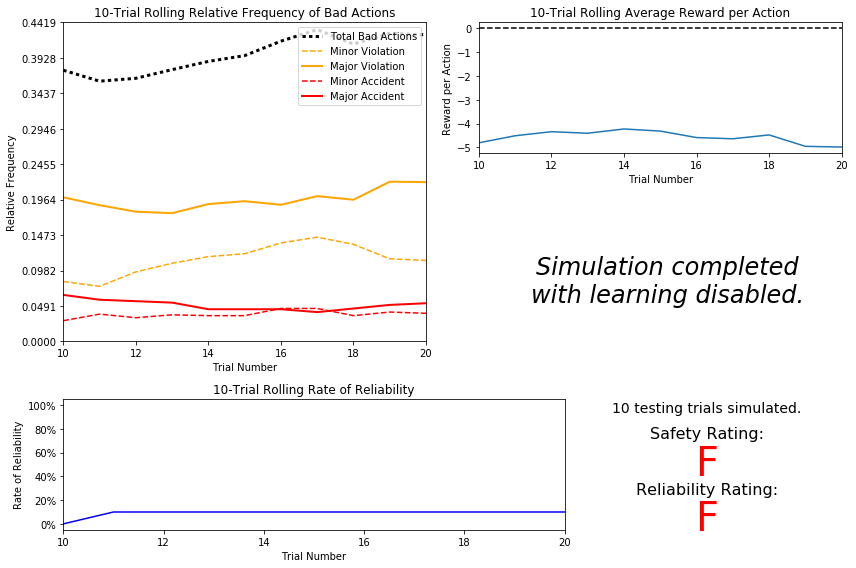

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

Rolling relative frequency of bad decision is around 0.42 after 20 trials. It means that more than every third decision is bad. Around 3.5 % of all decisions cause minor accidents and 5% even major accidents. Approximately every tenth decision leads to at last minor accident. 

The rolling rate of reliability is 5% after 20 trials. That means that only one trial was successful. This makes sense. The random agent does not care where to go. It can success only by luck. And as the number of time of each trial is limited the probability of success by random is low. 

Rolling average reward is approximate -5 after 20 trials. The agent has been heavily penalized for his bad decision. 

As the number of trials increases, the rolling averages of bad decisions are slightly grows or oscillating around the average. There is no clear down or up trend. 

This Smartcab fails both safety and reliability testing and should not be considered as safe or reliable. It can be considered safe only when it will get zero accidents and will not violate the major rules. It can be considered reliable only when it breaks certain reliability limit eg. more than 85% success. 




-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

My intuition is, that features which are important and relevant for a human driver, must be relevant for a smart car too. 

Following that intuition, I would say, that the **waypoint** feature is most important for efficiency - it show the best way to the desired destination. The **inputs** are relevant to the safety - they show the situation around the car. 

It is defined that *“At each intersection, there is a traffic light that either allows traffic in the North-South direction or the East-West direction.”*. By that - the most important inputs are **light**, **left**, and **oncoming**. The **right** seems not so important at first - because if all the drivers will follow the defined traffic rules then this information is not necessary. If the car is going forward or to left, the cars from the right have the red light and are stopped. On the other hand, even this input is necessary if we can not assume that all drivers follow the rules. If there is a car going from right through the red light, this information can help our car to avoid the collision. But I think that this is beyond the level of this project. Therefore I will drop the **right** feature.

Assuming that the waypoint shows the best possible way, I think that the **deadline** feature is not appropriate. It will be relevant only before the journey starts - if the deadline is shorter than best possible way or best expected time, then the journey should not start at all. But for the decisions during the journey, it is not necessary. Maybe it is even counter-productive at last for human drivers. A lot of accidents happens because someone is rushing for the deadline.

My final selection of features is: **waipoint**, **light**, **left**, and **oncoming**.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

In [3]:
import itertools

#possible values
waypoints = ['forward', 'left', 'right']
light = ['red','green']
oncoming = ['None', 'left', 'right', 'forward']
left = ['None', 'left', 'right', 'forward']
states = [waypoints, light, oncoming, left]

all_states = list(itertools.product(*states))

len(all_states)

96

**Answer:**

The size of state space is 96 when using waipoint, light, left, and oncoming features selected in question 4.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

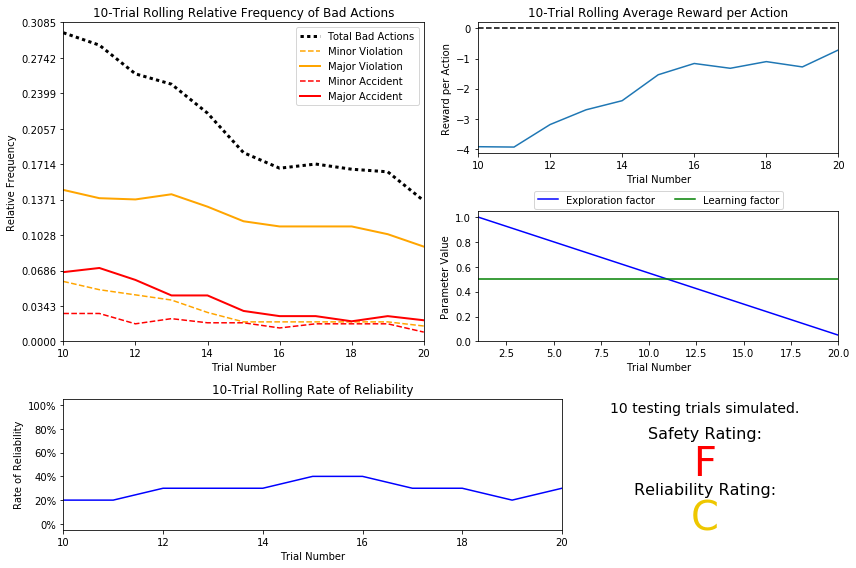

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Comparing with the basic agent we can see that there is obvious progress in agent behavior.  The agent is now more reliable and safe compared to previous one. But he is not good enough yet to give him driving license.  

Thanks to the learning process the rolling frequencies of all observed bad actions are dropping down as the number of trials grows.  This is the first difference, for the previous agent, there was not visible downtrend in those metrics. But even if all the error metrics have lower values at the end of the simulation, the agent is still not driving safely. More than 5% of the decisions made by the agent at the end, causes an accident - and that’s too many for any better grade than Failed.

On the other hand, reliability grows slightly with the number of trials. But there is a lot of randomness in agent behavior still. During the trials the rolling average of reliability almost hit 40% but then drops again. I think that means that the agent made some good decisions in the past, but obviously not for each state.

The agent did twenty training trials before testing. This value makes sense, it can even be simply computed in advance. The value of epsilon-tolerance used for this agent was 0.05 (the default value). We used a simple linear function as the decay function for epsilon. At each trial, the epsilon decay decremented the epsilon by the same value - 0.05. The initial value of epsilon was 1. And because 1/0.05 is 20, there can’t be more trials with given function and tolerance for epsilon. 

The linear decrease of exploration factor is clearly presented in the parameters panel. The number of bad actions is decreasing and the average reward is increasing as the number of trials grows. But even after the last trial, the average reward is below zero. 

For better results, we need to increase the number of learning trials. This parameter is affected by the decay function and epsilon-tolerance. By tuning this two parts of the algorithm, we can increase the number of trials.  After the number of trials will be higher than the size of state space, we can obtain better results in future experiments.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

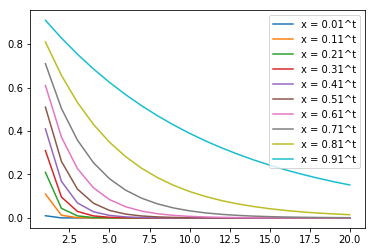

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 21)
aval = np.arange(0.01, 1.0, 0.1)
legends = []

for a in aval:
    plt.plot(x, a**x)
    legends.append('x = {}^t'.format(a))
  
plt.legend(legends,  loc='upper right')
plt.show()

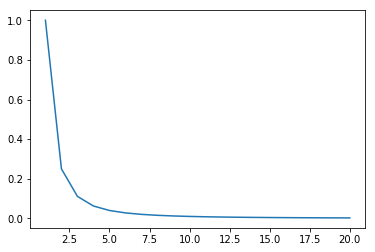

In [6]:
plt.plot(x, 1.0/x**2)

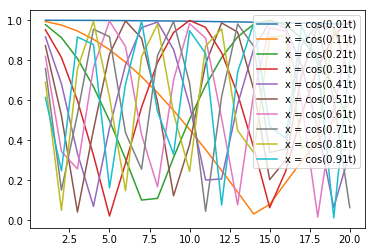

In [7]:
legends = []
for a in aval:
    plt.plot(x, np.absolute(np.cos(a*x)))
    legends.append('x = cos({}t)'.format(a))
plt.legend(legends,  loc='upper right')
plt.show()

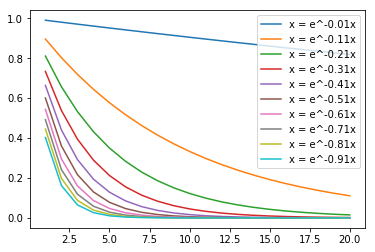

In [8]:
legends = []
for a in aval:
    plt.plot(x, np.exp(-1.0*a*x))
    legends.append('x = e^-{}x'.format(a))
plt.legend(legends,  loc='upper right')
plt.show()

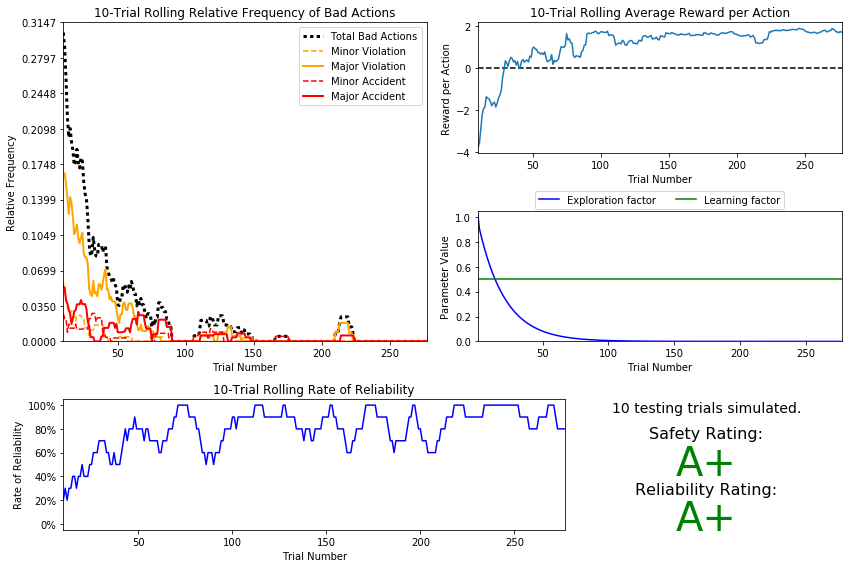

In [9]:
vs.plot_trials('sim_improved-learning_exp.csv')

**experiment1:** epsilon = exp( -0.05 * t), alpha = 0.5, tolerance=0.000001

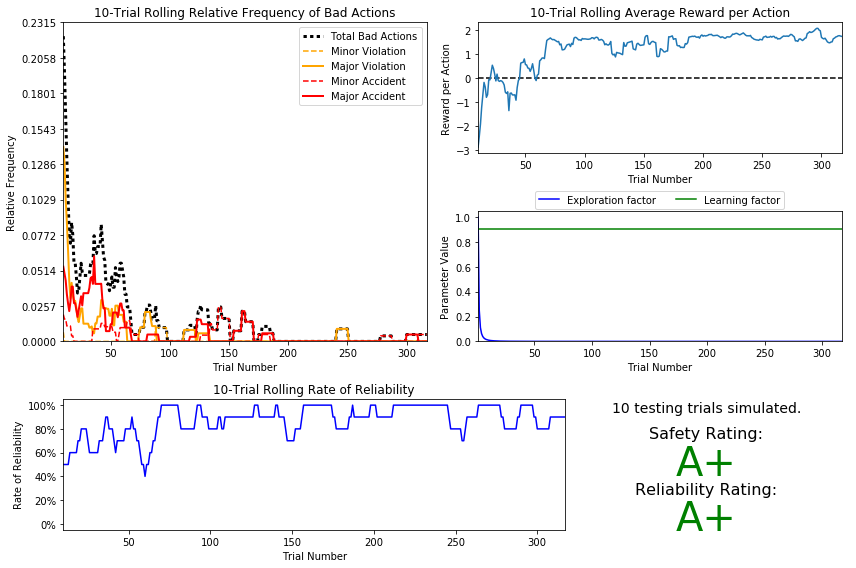

In [10]:
vs.plot_trials('sim_improved-learning_square.csv')

**experiment 2**: epsilon = 1.0/(trial_nr^2), alpha=0.9, tolerance=0.00001

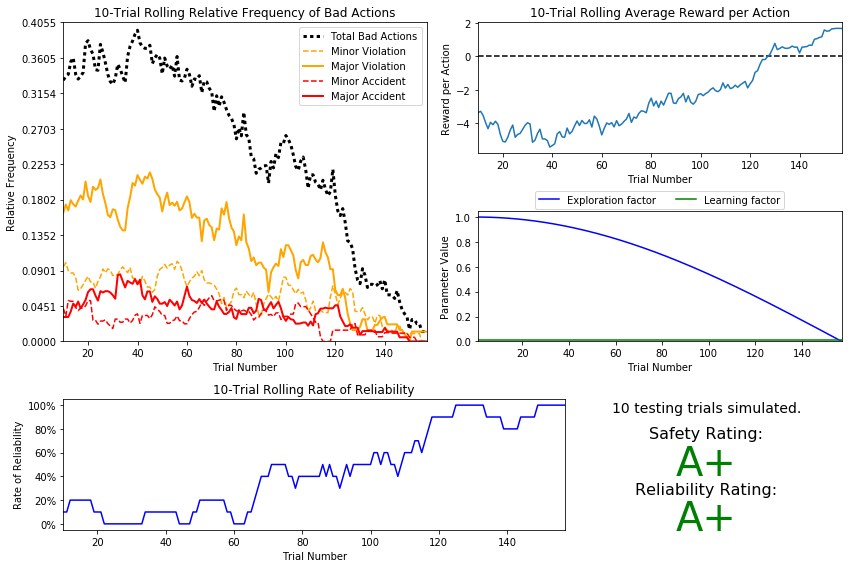

In [11]:
vs.plot_trials('sim_improved-learning_cos.csv')

**experiment 3**: self = math.fabs(math.cos(alpha*t)), alpha = 0.01, tolerance=0.001

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

Before final pick of decaying function, I decide to visualize all suggested functions. I want to get a better imagination of possible parameter values. It helped me to realize what combination of **tolerance** and **a** will lead to increase of training trials. I was looking for the slowly decreasing function. The above visualization confirms, that this is possible to achieve for every suggested function, with proper parameters. 

Then I started the experiments with the suggested functions and parameters, and become curious, if all the suggested functions can be used, or if there is the right one and we have to find it. After several trials, I was able to achieve A+ for both safety and reliability for three of the functions. 

Here is the summary of my results:

|Epsilon function|Nr. of trials|Tolerance|Alpha|Reliability|Safety|
|:--------------:|:-----------:|:-------:|:---:|:---------:|:----:|
|$e^{-0.05t}$    |270          |0.000001 |0.5  |A+         |A+    |
|$\frac{1}{t^2}$ |320          |0.00001  |0.9  |A+         |A+    |
|$\cos(0.01t)$   |160          |0.001    |0.01 |A+         |A+    |


The epsilon function combined with tolerance influences the number of training trials. Learning rate influences the quality of learning. Different functions have different requirements of learning rate value. I was choosing the parameter values with the goal to have a reasonable number of trials - more than state space dimension, but not too much to keep the training computation time low. Then I was setting the alpha experimentally - I tried the low, mid and high value and picked up the one with best results. 

I think that those results show significant improvement of the driving agent compared with the previous version. Agent passed all tests with the best possible grade. I see no reason to be unsatisfied with its result. I was using nr_test = 20 for all my experiments.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Four randomly chosen examples of state, with optimal policy:

|state |waypoint|light|left |oncomming|optimal policy|
|:----:|:------:|:---:|:---:|:-------:|:------------:|
|**s1**|left    |green|right|None     |**left**      |
|**s2**|forward |green|None |left     |**forward**   |
|**s3**|forward |red  |None |left     |**None**      |
|**s4**|right   |red  |None |right    |**right**     |

Observed policy from learning results file:

|state |forward|left |right|None|is optimal|
|:----:|:-----:|:---:|:---:|:--:|:--------:|
|**s1**|1.21   |0.00 |0.00 |0.00|**No**    |
|**s2**|1.81   |0.55 |0.66 |0.12|**Yes**   |
|**s3**|-13.36 |-7.01|0.39 |1.44|**Yes**   |
|**s4**|-5.36  |-20.11|0.00|1.71|**No**    |

First I randomly choose four states, without looking to the file with results. Then i searched the results of learning with e for those states. Surprisingly the selected policy was not optimal for two of them. 

For the state denoted as **s2** the learned policy is optimal. Next waypoint is to go forward, we have the green light and therefore optimal is to go forward. The other features are not important.

Also for the state **s3** is the learned policy optimal. Next waypoint is to go forward, but we have the red light and therefore optimal is to wait - None action. 

For the state **s1** the learned policy is not optimal. Next waypoint is set to the left, we have the green light, there is no upcoming traffic and the car on the left is turning to the right. There is no reason to go forward (learned) instead of left (optimal).

The state **s4** is the second example with not optimal policy. Next waypoint is to go to the right, but we have the red light. There is no car in left and the upcoming car is turning to the right. Following US traffic rules, we can go to the right and not wait for green. However, this is the tricky situation even for the non-US human drivers. In many countries the red always mean stop. The mistake here is not that surprising as in the first state.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I think that future rewards will not work because the future is unpredictable in this environment. 

We are trying to learn the smartcab how to follow the waypoints as quick as possible and obey the traffic rules. But in the moment of learning we only know the current state - we don’t know the future states except for the waypoints. 
The car can learn in advance that in next few steps will be best to go to the right for example. But it is impossible to predict, how will look the traffic situation at that moment. And of course, there are many situations where follow the waypoint is not optimal policy.  

That’s because the environment is changing in time. And only the change of the lights can be theoretically predicted. In the ideal environment, all the lights change the color at the same time and after the same time quantum.  But we can’t predict if there will be the cars, where they will be going etc. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.